# 🎈 인스타그램 태그

In [2]:
import requests
from bs4 import BeautifulSoup
from  selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time as time
import getpass
import urllib.request
import random
import re
 
from time import sleep
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
path = 'C:\chromedriver_win32\chromedriver.exe'
driver = webdriver.Chrome(path)

In [4]:
driver.get("https://www.instagram.com/accounts/login/" )
instagram_id= getpass.getpass("Input ID : ")
instagram_pw= getpass.getpass("Input PWD : ")

_id = driver.find_element_by_name('username')
_id.send_keys(instagram_id)
time.sleep(2)

_password = driver.find_element_by_name('password')
_password.send_keys(instagram_pw)
time.sleep(2)

Input ID : ········
Input PWD : ········


In [5]:
login_button = driver.find_element_by_css_selector('.sqdOP.L3NKy.y3zKF').click()
time.sleep(5) # 로그인 버튼 누르기

driver.find_element_by_css_selector('.sqdOP.yWX7d.y3zKF').click()
time.sleep(3) # 로그인 저장 나중에

driver.find_element_by_css_selector('.aOOlW.HoLwm').click()
time.sleep(3) # 설정 나중에

## 태그 수집

In [79]:
_keyword = input("검색어를 입력하세요 : ")
word = str(_keyword) 
driver.get('https://www.instagram.com/explore/tags/' + _keyword + '/')

검색어를 입력하세요 : 경기도파주


In [83]:
driver.find_element_by_css_selector('div.v1Nh3.kIKUG._bz0w').click() #첫번째 게시물 열기
time.sleep(5)

In [84]:
tagCollect = []
count = 100
for i in range(count):
    data = driver.find_elements_by_css_selector('a.xil3i') # 해쉬태그 정보 저장
    for j in range(len(data)):
        tagCollect.append(data[j].text.replace("#","")) # '#'없애기

    driver.find_element_by_css_selector("div.l8mY4.feth3").click() #다음 게시물로 이동
    time.sleep(3)

## 필요없는 태그들 잘라내기

In [87]:
stop_words = ["울산","경기도파주", "경기도", "파주", "경상북도", "경북", "경산", "대전", "유성", "전라남도", "전남", "광양", "나주", "강원도", "태백", "경주", "부산", "부산광역시", "북구", "안성", "경상남도", "경남", "진주", "제주", "화성", "칠곡", "충청남도", "충남", "논산", "전라북도", "전북", "임실", "서울","서울광역시", "은평","부산광역시강서구", "부산광역시사상구", "부산광역시북구",""]
tagMost = [ i for i in tagCollect if i not in stop_words ]

print(tagMost)


['앤드테라스파주', '마장호수출렁다리', '마장호수출렁다리', '여행다녀왔습니다', '여행다녀왔습니다', '여행다녀왔습니다_국내', '여행다녀왔습니다_파주', 'travelmenu1', '경기도여행', '파주여행', '파주가볼만한곳', '서울근교여행', '서울근교데이트', '파주여행코스', '파주여행코스추천', '마장호수', '레드브릿지', '파주레드브릿지', '파주드라이브코스', '파주드라이브', '파주드라이추천', '파주걷기좋은곳', '국내여행', '국내여행추천', '데이트코스추천', '임진각평화누리공원', '파주', '아이랑갈만한곳', 'kmanjourney', 'dailypic', '파주삼릉', '산책', 'discoverkorea', 'explorekorea', 'adventurekorea', 'imagineyourkorea', 'southkoreatravel', 'ig_korea', 'instakorea', 'travelkorea', 'koreatour', 'koreatrip', 'unesco', 'worldheritage', 'corea', 'photographylover', '韓國旅行', 'heritage', 'ruins', 'historic', 'site', 'moment', 'kboyjourney', 'landscape_lovers', 'instablog', '사진계정맞팔', 'dreamholiday', 'premierleague', 'laliga', 'bundesliga', 'england🇬🇧', 'spain🇪🇸', 'germany🇩🇪', 'atleticomadrid', 'plus500', 'nike', 'paju', 'korea🇰🇷', 'footballjersey', 'football', 'overthepitch', '프리메라리가', '아틀레티코마드리드', '파주출판단지', '파주카페', '레사모', '오버더피치', '나이키', '축구유니폼', '축구레플리카', '마드리드', '유기동물

## 시각화

<BarContainer object of 30 artists>

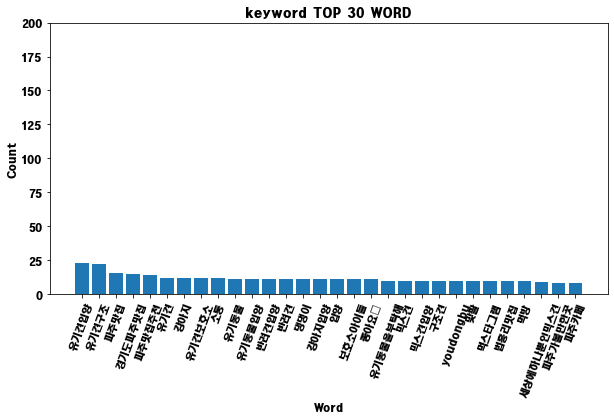

In [88]:
import nltk
 
results_str = " ".join(tagMost) # 결과값 list to string
tokens = results_str.split(" ") # 각 단어별로 떼어 내서
text = nltk.Text(tokens) # text에 저장하고
topWord = text.vocab().most_common(30) # 가장 많이 등장하는 30개의 단어를 추려낸다.
count = 30
xlist = [a[0] for a in topWord[:count ]]
ylist = [a[1] for a in topWord[:count ]]

# 한글 폰트 설정 ( 깨짐 방지 )
from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts\HMKMRHD.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
    
plt.figure(figsize = (10,5)) # 그래프 크기 지정
plt.xlabel('Word') # X축 이름
plt.xticks(rotation=70) # X축 라벨 회전
plt.ylabel('Count') # Y축 이름
plt.title('keyword TOP '+str(count)+' WORD')
plt.ylim([0, 200]) # 그래프의 Y축 크기 조절
plt.bar(xlist,ylist) # bar로 실행하면 막대그래프. plot으로 실행하면 꺾은선 그래프.

## wordcloud

In [91]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path="C:\Windows\Fonts\HMKMRHD.ttf",max_font_size=100).generate(results_str) # word cloud

(-0.5, 399.5, 199.5, -0.5)

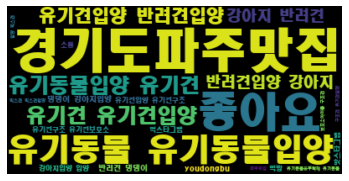

In [92]:
fig = plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# 🎈게시글 위치정보

In [59]:
_keyword = input("검색어를 입력하세요 : ")
word = str(_keyword) 
driver.get('https://www.instagram.com/explore/tags/' + _keyword + '/')

검색어를 입력하세요 : 경상북도경주


In [60]:
driver.find_element_by_css_selector('div.v1Nh3.kIKUG._bz0w').click() #첫번째 게시물 열기
time.sleep(5)

In [46]:
import re
from bs4 import BeautifulSoup

def get_content(driver):

    # 1. 현재 게시글 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')


    # 2. 본문 내용 가져오기
    # 본문 내용이 없을 수 있으므로 예외 처리구문을 이용
    try:
        content = soup.select('div.C4VMK > span')[0].text
    except:
        content = ''

    # 3. 작성 일시, 좋아요 수 , 위치 정보 가져오기
    # 해쉬 태그는 정규 표현식을 이용해 가져온다.
    tags = re.findall(r'#[^\s#,\\]+', content)  

    #  작성일자 정보 가져오기
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]

    #  좋아요 수 가져오기
    # 예외처리구문.
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
    except:
        like = 0
    # 위치정보
    # 예외 처리구문
    try: 
        place = soup.select('div.M30cS')[0].text
    except:
        place = ''
    # 4. 저장하기
    data = [content, date, like, place, tags]
    return data

get_content(driver)

['', '2021-12-13', 0, '忍城', []]

In [48]:
def next_page(driver):
    next_page = driver.find_element_by_css_selector('div.l8mY4.feth3')
    next_page.click()
    time.sleep(3)
next_page(driver)

In [64]:
# 크롤링 결과를담을 리스트 생성
result = [ ]


# 여러 게시글 수집하기
target = 50      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시 5초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        result.append(data)
        next_page(driver)
    except:
        time.sleep(5)
        next_page(driver)

In [78]:
resultFrame = pd.DataFrame(result)
resultFrame[3].replace('', np.nan, inplace=True)
resultFrame[[3]].dropna(axis=0)

,3
0,경주 맷돌 순두부
1,경주 황리단길
2,경상북도 경주
3,경상북도 경주
5,경상북도 경주
6,경상북도 경주
7,경주 황리단길
8,경주 황리단길
9,경상북도 경주
12,셀세모


In [67]:
print(result)

[['', '2021-10-30', 0, '경주 맷돌 순두부', []], ['', '2021-10-30', 0, '경주 황리단길', []], ['', '2021-10-25', 0, '경상북도 경주', []], ['', '2021-10-24', 0, '경상북도 경주', []], ['', '2021-10-24', 0, '', []], ['', '2021-10-23', 0, '경상북도 경주', []], ['', '2021-10-20', 0, '경상북도 경주', []], ['', '2021-10-20', 0, '경주 황리단길', []], ['', '2021-10-19', 0, '경주 황리단길', []], ['', '2021-10-18', 0, '경상북도 경주', []], ['', '2021-10-16', 0, '', []], ['', '2021-10-15', 0, '', []], ['', '2021-10-14', 0, '셀세모', []], ['', '2021-10-12', 0, '경주 황리단길', []], ['', '2021-10-11', 0, '', []], ['', '2021-10-10', 0, '경주 월정교', []], ['', '2021-10-10', 0, '', []], ['', '2021-10-09', 0, '', []], ['', '2021-10-08', 0, '도리마을', []], ['', '2021-10-07', 0, '', []], ['', '2021-10-06', 0, '석굴암', []], ['', '2021-10-05', 0, '경주 월정교', []], ['', '2021-10-05', 0, '경주 황리단길', []], ['', '2021-10-04', 0, '', []], ['', '2021-10-03', 0, '경상북도 경주', []], ['', '2021-09-22', 0, '경주', []], ['', '2021-09-22', 0, '경상북도 경주', []], ['', '2021-09-19', 0, '황남빵', []], ['', '2021-

In [66]:
import nltk
 
results_str = " ".join(result) # 결과값 list to string
tokens = results_str.split(" ") # 각 단어별로 떼어 내서
text = nltk.Text(tokens) # text에 저장하고
topWord = text.vocab().most_common(3) # 가장 많이 등장하는 30개의 단어를 추려낸다.
count = 3
xlist = [a[0] for a in topWord[:count ]]
ylist = [a[1] for a in topWord[:count ]]

# 한글 폰트 설정 ( 깨짐 방지 )
from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts\HMKMRHD.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
    
plt.figure(figsize = (10,5)) # 그래프 크기 지정
plt.xlabel('Word') # X축 이름
plt.xticks(rotation=70) # X축 라벨 회전
plt.ylabel('Count') # Y축 이름
plt.title('keyword TOP '+str(count)+' WORD')
plt.ylim([0, 200]) # 그래프의 Y축 크기 조절
plt.bar(xlist,ylist) # bar로 실행하면 막대그래프. plot으로 실행하면 꺾은선 그래프.

TypeError: sequence item 0: expected str instance, list found